In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('dataset_small.csv')

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [4]:
##check missing values
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,2,0,0,0,0,0,0,0,0,0,...,185,1,4,2,3598,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,-1,1,4,1,3977,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,106,1,2,1,10788,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,319,1,2,1,14339,1,0,0,0,0
4,1,1,0,4,0,0,0,0,0,0,...,-1,1,2,1,389,1,1,0,0,0


In [7]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

[1.04246129e-02 8.87059307e-03 1.65977445e-03 3.67439676e-02
 1.45302797e-05 6.05846324e-04 6.23714439e-04 2.61164081e-04
 9.61789466e-05 3.81941489e-06 1.07530442e-04 7.67587895e-05
 2.60352937e-04 2.80846758e-05 0.00000000e+00 1.28816166e-05
 4.97369363e-04 2.16201848e-03 2.30705672e-02 2.94378387e-02
 5.78796974e-03 1.83078998e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.32598136e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.80226798e-02 2.17341713e-02 8.39925448e-04 1.40446722e-04
 1.71655143e-02 1.53641473e-02 1.73639025e-03 4.98402748e-02
 3.14362500e-02 8.07236531e-03 2.19054607e-04 3.08668636e-05
 1.17981506e-02 1.96945516e-06 1.19004496e-02 1.64252896e-04
 7.92033352e-03 1.39397311e-05 3.53657812e-02 3.93489645e-03
 5.30405727e-04 2.53681069e-02 9.28086941e-03 3.33488171e-03
 7.05394075e-03 5.10839062e-02 4.32248437e-02 1.18281445e-02
 3.93626179e-03 1.182035

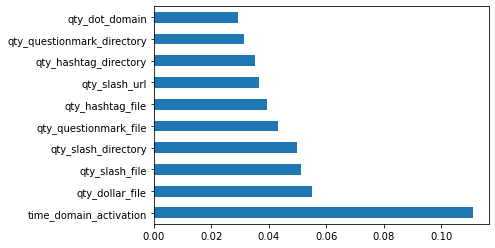

In [8]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
top_features=feat_importances.nlargest(10)
top_features.keys()

Index(['time_domain_activation', 'qty_dollar_file', 'qty_slash_file',
       'qty_slash_directory', 'qty_questionmark_file', 'qty_hashtag_file',
       'qty_slash_url', 'qty_hashtag_directory', 'qty_questionmark_directory',
       'qty_dot_domain'],
      dtype='object')

In [12]:
final_df=df[top_features.keys()]
final_df.head()
X=final_df
y=df['phishing']
print(y)

0        0
1        0
2        0
3        1
4        1
        ..
58640    1
58641    0
58642    1
58643    0
58644    0
Name: phishing, Length: 58645, dtype: int64


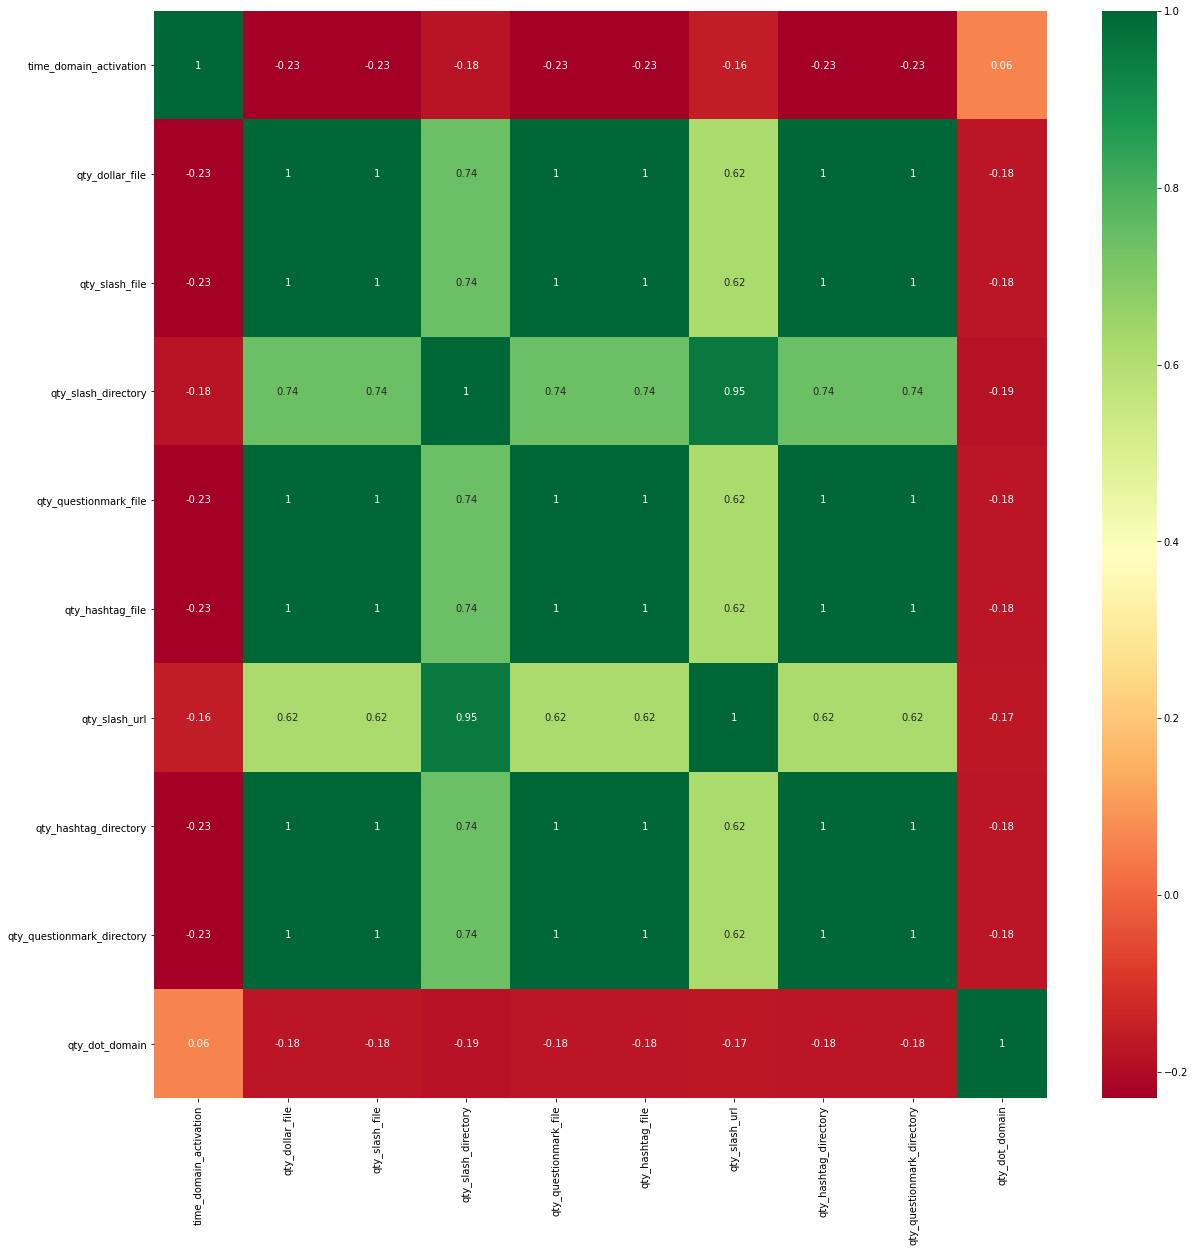

In [13]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [18]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [20]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [21]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [23]:
predictions=rf_random.predict(X_test)

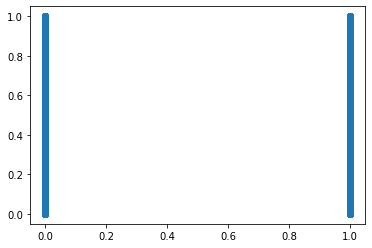

In [24]:
plt.scatter(y_test,predictions)

In [25]:
predictions=np.round(predictions)
print(predictions)

[1. 1. 1. ... 1. 0. 1.]


In [26]:
from sklearn import metrics

results = metrics.accuracy_score(y_test, predictions)
print(results)

0.8889962487211549


In [27]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)